In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
user_credential = user_secrets.get_gcloud_credential()
user_secrets.set_tensorflow_credential(user_credential)
print("Yess")

In [3]:
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None
                                                                   
if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.0.2:8470


2022-06-24 05:01:35.516798: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-24 05:01:35.520162: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-06-24 05:01:35.520204: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-24 05:01:35.520231: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cdcb57beaf35): /proc/driver/nvidia/version does not exist
2022-06-24 05:01:35.524079: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

REPLICAS:  8


In [ ]:
DATADIR = "../input/kannada-images-with-noise/Images_with_noise"
print("akdj")       

In [ ]:
s="img00"
CATEGORIES=[]
for i in range(1,658):
  if(i==10):
    s="img0"
  elif(i==100):
    s="img"
  CATEGORIES.append(s+str(i))

print("ndbashdb")

In [ ]:
import os
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [ ]:
print(img_array)
print(img_array.shape)
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        try:
          for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
        except Exception as e:
           pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

In [ ]:
import numpy
training_data= numpy.array(training_data)
# save numpy array as npy file
from numpy import asarray
from numpy import save
np.save('./t1.npy', training_data)

In [4]:
from numpy import load
training_d= np.load('../input/train1234567891011/train.npy',allow_pickle=True)

In [5]:
print(len(training_d ))

847840


In [6]:
import random
random.shuffle(training_d)

In [8]:
train_dt = np.array_split(training_d, 2)
print("sadfe")

sadfe


In [ ]:
def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=1)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [*IMAGE_SIZE,1]) # explicit size needed for TPU
    print(image.shape)
    return image

In [ ]:
for s,f in train_dt[0][:10]:
  print(s)
  print(f)

In [17]:
with strategy.scope():
    model=cos1()
    model.compile(
        optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
    )

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 50, 1)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 64)        640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 128)       0   

cos1 

In [12]:
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model
input = Input(shape =(50,50,1))



def cos1():
    # 1st Conv Block
    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
    # 2nd Conv Block

    x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
    # 3rd Conv block  
    x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
    x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
    x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
    # 4th Conv block

    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

    # 5th Conv block

    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

    # Fully connected layers  
    x = Flatten()(x) 
    x = Dense(units = 4096, activation ='relu')(x) 
    x = Dense(units = 4096, activation ='relu')(x) 
    output = Dense(units = 585, activation ='softmax')(x)
    # creating the model
    model = Model (inputs=input, outputs =output)
    model.summary()
    return model

COSTUME

In [ ]:
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model
input = Input(shape =(50,50,1))



def COS():
    # 1st Conv Block
    x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(input)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
    x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
    x = Conv2D (filters =32, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
    x = Flatten()(x) 
    x = Dense(units = 4096, activation ='relu')(x) 
    x = Dense(units = 4096, activation ='relu')(x) 
    output = Dense(units = 585, activation ='softmax')(x)
    # creating the model
    model = Model (inputs=input, outputs =output)
    model.summary()
    return model

In [ ]:
with strategy.scope():
    model=COS()
    model.compile(
        optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
    )

In [ ]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [26]:
IMG_SIZE = 50
test_d=train_dt[0]
def xy(training_data):
    X = []
    y = []
    for features,label in training_data:
        X.append(features)
        y.append(label)
    print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    return X,y;


In [ ]:
for f,l in train_dt[1]:
    print(l)
    break

In [68]:
X,y=xy(train_dt[0])

print(len(X))

[[[[254]
   [254]
   [254]
   ...
   [254]
   [254]
   [254]]

  [[253]
   [254]
   [254]
   ...
   [254]
   [254]
   [255]]

  [[254]
   [255]
   [254]
   ...
   [112]
   [254]
   [254]]

  ...

  [[254]
   [255]
   [207]
   ...
   [255]
   [207]
   [207]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [254]
   [255]
   [255]]]]
423920


In [67]:
def train_model(X,y):
    history=[]
    history=model.fit(X, y, batch_size=64, epochs=6, validation_split=0.3)
    return history

In [18]:
x1=np.array(X)
y1=np.array(y)
history=model.fit(x1, y1, batch_size=64, epochs=6, validation_split=0.3)

Epoch 1/6
4637/4637 [==============================] - 162s 31ms/step - loss: 2.8834 - sparse_categorical_accuracy: 0.4878 - val_loss: 5.7300 - val_sparse_categorical_accuracy: 0.6747
Epoch 2/6
4637/4637 [==============================] - 130s 28ms/step - loss: 0.2513 - sparse_categorical_accuracy: 0.9282 - val_loss: 5.9828 - val_sparse_categorical_accuracy: 0.7173
Epoch 3/6
4637/4637 [==============================] - 130s 28ms/step - loss: 0.2115 - sparse_categorical_accuracy: 0.9405 - val_loss: 6.2558 - val_sparse_categorical_accuracy: 0.7228
Epoch 4/6
4637/4637 [==============================] - 128s 28ms/step - loss: 0.1941 - sparse_categorical_accuracy: 0.9461 - val_loss: 8.1265 - val_sparse_categorical_accuracy: 0.7158
Epoch 5/6
4637/4637 [==============================] - 129s 28ms/step - loss: 0.1986 - sparse_categorical_accuracy: 0.9460 - val_loss: 7.3283 - val_sparse_categorical_accuracy: 0.7429
Epoch 6/6
4637/4637 [==============================] - 129s 28ms/step - loss: 0.

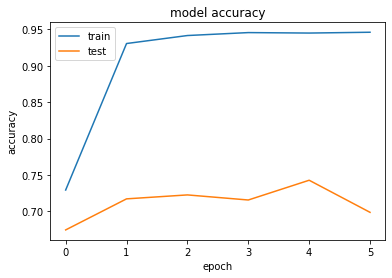

In [19]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()  

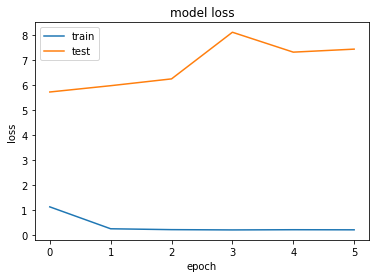

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model.save('./smart_doc_mod2.h5')

In [24]:
from tensorflow import keras
model = keras.models.load_model('./smart_doc_mod2.h5')

In [71]:
x,y=xy(test_d)
x=np.array(X)
y=np.array(y)


[[[[254]
   [254]
   [254]
   ...
   [254]
   [254]
   [254]]

  [[253]
   [254]
   [254]
   ...
   [254]
   [254]
   [255]]

  [[254]
   [255]
   [254]
   ...
   [112]
   [254]
   [254]]

  ...

  [[254]
   [255]
   [207]
   ...
   [255]
   [207]
   [207]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [254]
   [255]
   [255]]]]


In [72]:
x.shape

(423920, 50, 50, 1)

In [74]:
p = model.predict(x[2500:3000])
l=y[2500:3000]
pr=[]
k=0
print(p.shape)
for x in p:
    m=-100000
    k=0
    for i in range(0,585):
        if(x[i]>m):
            k=i
            m=x[i]
    pr.append(k)

(500, 585)


In [76]:
pr[488]

1

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(l,pr)
print(cm)

[[444   9   3   1]
 [  0  43   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
